In [4]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import main

nlp = spacy.load("pl_core_news_lg")
nlp.add_pipe('spacytextblob')
list_of_posts1 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_agh.txt") #88k obserwujących
list_of_posts2 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_uj.txt") #100k obserwujących
list_of_posts3 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_uw.txt") #175k obserwujących
list_of_posts4 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_pw.txt") #103k obserwujących
list_of_posts5 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_pg.txt") #56k obserwujących
list_of_posts6 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_uam.txt") #60k obserwujących
list_of_posts7 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_umk.txt") #34k obserwujących

list_of_lists = [list_of_posts1, list_of_posts2, list_of_posts3, list_of_posts4, list_of_posts5, list_of_posts6, list_of_posts7]


In [14]:
list_org1 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_otwarte_klatki.txt")
list_org2 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_niebezpiecznik.txt")
list_org3 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_wedel.txt")
list_org4 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_mbank.txt")
list_org5 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_budimex.txt")
list_org6 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_santander.txt")

list_organizations = [list_org1, list_org2, list_org3, list_org4, list_org5, list_org6]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for list in list_of_lists:
    print(len(list))
    reacts_count = 0

    for post in list:
        reacts_count += int(post[1])

    reacts_average = reacts_count / len(list)
    print(reacts_average)

    for post in list:
        doc = nlp(post[0])
        if doc._.polarity != 0 and int(post[1]) / reacts_average > 1:
            x.append(doc._.polarity)
            y.append(int(post[1]) / reacts_average)

x_array = np.array(x)
y_array = np.array(y)

print(len(x_array))

103
123.71844660194175
146
142.85616438356163
101
174.01980198019803
39
110.05128205128206
85
125.10588235294118
49
84.6734693877551
111
46.891891891891895
18


149
32.14093959731544
295
305.27457627118645
95
83.25263157894737
180
128.9611111111111
102
67.94117647058823
404
45.60891089108911
53


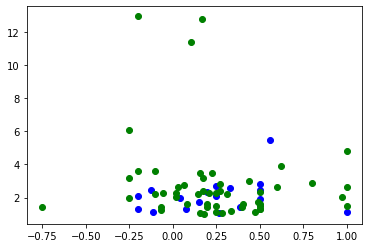

In [7]:
x_org = []
y_org = []

for list in list_organizations:
    print(len(list))
    reacts_count = 0

    for post in list:
        reacts_count += int(post[1])

    reacts_average = reacts_count / len(list)
    print(reacts_average)

    for post in list:
        doc = nlp(post[0])
        if doc._.polarity != 0 and (int(post[1]) / reacts_average > 1 and int(post[1]) > 99): # Dodać ograniczenie górne
            x_org.append(doc._.polarity)
            y_org.append(int(post[1]) / reacts_average)

x_org_array = np.array(x_org)
y_org_array = np.array(y_org)

print(len(x_org_array))

plt.plot(x_array, y_array, 'bo')
plt.plot(x_org_array, y_org_array, 'go')
plt.show()

123.71844660194175
142.85616438356163
174.01980198019803
110.05128205128206
125.10588235294118
84.6734693877551
46.891891891891895
32.14093959731544
305.27457627118645
83.25263157894737
128.9611111111111
67.94117647058823
45.60891089108911


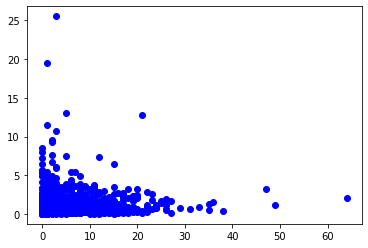

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

x_org = []
y_org = []

for list in list_of_lists:

    reacts_count = 0
    for post in list:
        reacts_count += int(post[1])

    reacts_average = reacts_count / len(list)
    print(reacts_average)

    for post in list:
        if int(post[1]) / reacts_average > 0:
            doc = nlp(post[0])
            x.append(len(doc.ents))
            y.append(int(post[1]) / reacts_average)

for list in list_organizations:

    reacts_count = 0
    for post in list:
        reacts_count += int(post[1])

    reacts_average = reacts_count / len(list)
    print(reacts_average)

    for post in list:
        if int(post[1]) / reacts_average > 0:
            doc = nlp(post[0])
            x.append(len(doc.ents))
            y.append(int(post[1]) / reacts_average)


x_array = np.array(x)
y_array = np.array(y)

x_org_array = np.array(x_org)
y_org_array = np.array(y_org)

plt.plot(x_array, y_array, 'bo')
plt.plot(x_org_array, y_org_array, 'go')
plt.show()

('Telewizja TVP Info przegrała w sądzie i musiala opublikować przeprosiny na stronie głównej. Wejdźcie i zobaczcie jak zupełnie przypadkiem strona się Wam przesuwa tak, żeby przeprosin całych nie dojrzeć. Kod strony pokazuje jak bardzo przypadkowe jest to przesunięcie. Żena lvl CSS, ale Barbara Streisand lubi to!', '2900')
32.14093959731544
305.27457627118645


C:\Users\Kuba\AppData\Local\Temp/ipykernel_15388/1750095291.py:26: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  x_similarity.append(doc.similarity(most_popular_post_doc))


83.25263157894737
128.9611111111111
67.94117647058823
45.60891089108911


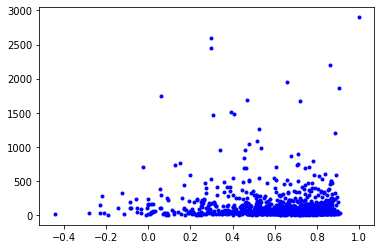

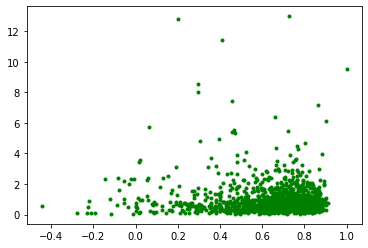

In [19]:
x_similarity = []
y_similarity_react = []
y_similarity_index = []

most_popular_post = ['text','0']
for list in list_organizations:
    for post in list:
        if int(post[1]) > int(most_popular_post[1]):
            most_popular_post = post

print(most_popular_post)

most_popular_post_doc = nlp(most_popular_post[0])

for list in list_organizations:

    reacts_count = 0
    for post in list:
        reacts_count += int(post[1])

    reacts_average = reacts_count / len(list)
    print(reacts_average)

    for post in list:
        doc = nlp(post[0])
        x_similarity.append(doc.similarity(most_popular_post_doc))
        y_similarity_react.append(int(post[1]))
        y_similarity_index.append(int(post[1]) / reacts_average)

plt.plot(x_similarity, y_similarity_react, 'b.')
plt.show()
plt.plot(x_similarity, y_similarity_index, 'g.')
plt.show()

In [23]:
# TOPIC MODELING

from spacy.lang.pl import STOP_WORDS
from tqdm import tqdm
from spacy import Language
import numpy as np

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

import spacy


nlp= spacy.load("pl_core_news_lg")

# My list of stop words.
stop_list = ["móc", "mieć", "  ", "   ", "    ", "     ", "      ", "       ", "chcieć", "problem", "xd", "jakieś", "siema", "wiedzieć", "robić", "zrobić", "mówić", "pytanie", "rok", "czas", "dziewczyna", "nbsp", "https", "http", "the", "of", "in", "and"]

#rok, dziewczyna

# Updates spaCy's default stop words list with my additional words.
nlp.Defaults.stop_words.update(stop_list)

# Iterates over the words in the stop words list and resets the "is_stop" flag.
for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True

@Language.component("my_lemmatizer")
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them.
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)

@Language.component("my_stopwords")
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

# The add_pipe function appends our functions to the default pipeline.
nlp.add_pipe("my_lemmatizer",after='ner')
nlp.add_pipe("my_stopwords", last=True)


doc_list = []
# Iterates through each article in the corpus.
for list in list_organizations:
    for doc in tqdm(list):
        # Passes that article through the pipeline and adds to a new list.
        pr = nlp(doc[0])
        doc_list.append(pr)

doc_list[0]

100%|██████████| 404/404 [00:12<00:00, 31.13it/s]


['wspaniały',
 'wiadomość',
 '2022',
 'Włochy',
 'zginąć',
 'zwierzę',
 'hodowane',
 'futro',
 'dzięki',
 'wieloletni',
 'działanie',
 'organizacja',
 'lav',
 'udać',
 'zakazać',
 'hodowla',
 'zwierzę',
 'futro',
 'kraj',
 'organizacja',
 'działać',
 'zakaz',
 '2011',
 '10',
 'działanie',
 'udać',
 'musić',
 'położyć',
 'kresa',
 'okrutny',
 'anachroniczny',
 'hodowla',
 'istnieć',
 'cywilizowanym',
 'społeczeństwo',
 'troszczącym',
 'czujące',
 'istota',
 'skomentować',
 'aktywista',
 'lav',
 'włoski',
 'ferma',
 'rocznie',
 'ginąć',
 '60',
 '000',
 'zwierzę',
 'niestety',
 'polski',
 'ferma',
 'rocznie',
 'ginąć',
 '5',
 'milion',
 'niedawno',
 'razem',
 'małgorzata',
 'tracz',
 'zapowiedzieć',
 'złożenie',
 'projekt',
 'zakaz',
 'hodowla',
 'zwierzę',
 'futro',
 '10',
 'prowadzenie',
 'kampania',
 'udać',
 'przyszły',
 'zakazać',
 'okrucieństwo',
 'trzymać',
 'kciuk',
 'podpisać',
 'apel',
 'polityk',
 'cenafutra.info']

In [25]:
words = corpora.Dictionary(doc_list)

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=words,
                                            num_topics=6,
                                            random_state=2,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

print(lda_model.print_topics(num_words=10))

[(0, '0.007*"santander" + 0.006*"bank" + 0.004*"firma" + 0.004*"polski" + 0.004*"polska" + 0.004*"strona" + 0.003*"bankowość" + 0.003*"zapraszać" + 0.003*"kolejny" + 0.003*"klient"'), (1, '0.005*"bank" + 0.004*"polska" + 0.004*"santander" + 0.004*"pracownik" + 0.004*"s" + 0.003*"Polska" + 0.003*"dziękować" + 0.003*"Wedel" + 0.003*"polski" + 0.003*"firma"'), (2, '0.004*"nowy" + 0.004*"praca" + 0.004*"dobry" + 0.003*"bank" + 0.003*"budimex" + 0.003*"klient" + 0.003*"pasja" + 0.003*"zapraszać" + 0.002*"dzięki" + 0.002*"wielki"'), (3, '0.005*"nowy" + 0.004*"pracownik" + 0.004*"firma" + 0.004*"bank" + 0.003*"praca" + 0.003*"polski" + 0.003*"dziecko" + 0.003*"osoba" + 0.003*"santander" + 0.003*"ważny"'), (4, '0.007*"bank" + 0.005*"santander" + 0.004*"polski" + 0.004*"zwierzę" + 0.003*"pierwszy" + 0.003*"s" + 0.003*"wielki" + 0.002*"Polska" + 0.002*"2021" + 0.002*"konkurs"'), (5, '0.009*"bank" + 0.008*"praca" + 0.006*"pracownik" + 0.006*"zwierzę" + 0.005*"santander" + 0.005*"program" + 0.004*

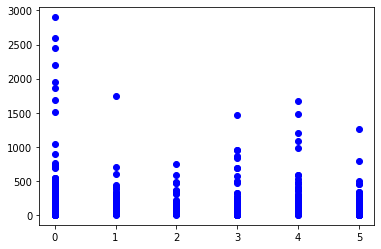

In [26]:
corpus_transformed = lda_model[corpus]

x_topic = []
y_topic_react = []

i = 0
for list in list_organizations:
    for post in list:
        x_topic.append(corpus_transformed[i][0][0][0])
        y_topic_react.append(int(post[1]))
        i+=1

x_topic_array = np.array(x_topic)
y_topic_react_array = np.array(y_topic_react)
plt.plot(x_topic_array, y_topic_react_array, 'bo')
plt.show()